In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
%matplotlib inline
plt.rcParams['figure.figsize'] = [9.5, 6]

In [149]:
train = pd.read_csv("./data/covid19-global-forecasting-week-4/train.csv")
test = pd.read_csv("./data/covid19-global-forecasting-week-4/test.csv")
useful_features = pd.read_csv("./data/countries_useful_features.csv")

In [150]:
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [151]:
print("The lowest date in the train data set is", train['Date'].min() ,"and the highest", train['Date'].max())
print("The lowest date in the test data set is", test['Date'].min() ,"and the highest", test['Date'].max())

The lowest date in the train data set is 2020-01-22 and the highest 2020-05-08
The lowest date in the test data set is 2020-04-02 and the highest 2020-05-14


In [152]:
# date:string -> date:datatime
train['Date'] = pd.to_datetime(train['Date'], format = '%Y-%m-%d')
test['Date'] = pd.to_datetime(test['Date'], format = '%Y-%m-%d')
train.dtypes

Id                         int64
Province_State            object
Country_Region            object
Date              datetime64[ns]
ConfirmedCases           float64
Fatalities               float64
dtype: object

In [153]:
train.fillna("None", inplace=True)
test.fillna("None", inplace=True)
useful_features.fillna("None", inplace=True)

display(train.head())
display(useful_features.head())

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,None,Afghanistan,2020-01-22,0.0,0.0
1,2,None,Afghanistan,2020-01-23,0.0,0.0
2,3,None,Afghanistan,2020-01-24,0.0,0.0
3,4,None,Afghanistan,2020-01-25,0.0,0.0
4,5,None,Afghanistan,2020-01-26,0.0,0.0


,Country_Region,Population_Size,Tourism,Date_FirstFatality,Date_FirstConfirmedCase,Latitude,Longtitude,Mean_Age,Lockdown_Date,Lockdown_Type,Country_Code
0,Afghanistan,37172386,14000,2020-03-23,2020-02-25,33.939110,67.709953,17.3,2020-03-24,Full,AFG
1,Albania,2866376,5340000,2020-03-12,2020-03-10,41.153332,20.168331,36.2,2020-03-08,Full,ALB
2,Algeria,42228429,2657000,2020-03-13,2020-02-26,28.033886,1.659626,27.5,2020-03-24,Full,DZA
3,Andorra,77006,3042000,2020-03-23,2020-03-03,42.546245,1.601554,37.0,2020-03-16,Full,AND
4,Angola,30809762,218000,2020-03-30,2020-03-21,-11.202692,17.873887,16.4,None,None,AGO


In [201]:
top10_countries = train[train['Date'] == train['Date'].max()]
top10_countries = top10_countries.groupby('Country_Region', as_index=False)['ConfirmedCases','Fatalities'].sum()
top10_countries = df_countries.nlargest(10, 'ConfirmedCases')
top10_countries

,Country_Region,ConfirmedCases,Fatalities
171,US,1283762.0,77175.0
156,Spain,222857.0,26299.0
84,Italy,217185.0,30201.0
175,United Kingdom,212629.0,31316.0
138,Russia,187859.0,1723.0
61,France,176202.0,26233.0
65,Germany,170588.0,7510.0
23,Brazil,146894.0,10017.0
170,Turkey,135569.0,3689.0
80,Iran,104691.0,6541.0


In [264]:
country_by_date = pd.DataFrame(train.groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

def get_country_by_date(df, country):
    return country_by_date.loc[(country_by_date['Country_Region'] == country) & (country_by_date['ConfirmedCases'] > 0)]

In [265]:
df_turkey = get_country_by_date(country_by_date, 'Turkey')
df_turkey

,Country_Region,Date,ConfirmedCases
7976,Turkey,2020-03-11,1.0
7977,Turkey,2020-03-12,1.0
9418,Turkey,2020-03-13,5.0
9421,Turkey,2020-03-14,5.0
9471,Turkey,2020-03-15,6.0
11083,Turkey,2020-03-16,18.0
12278,Turkey,2020-03-17,47.0
13235,Turkey,2020-03-18,98.0
14068,Turkey,2020-03-19,192.0
14885,Turkey,2020-03-20,359.0


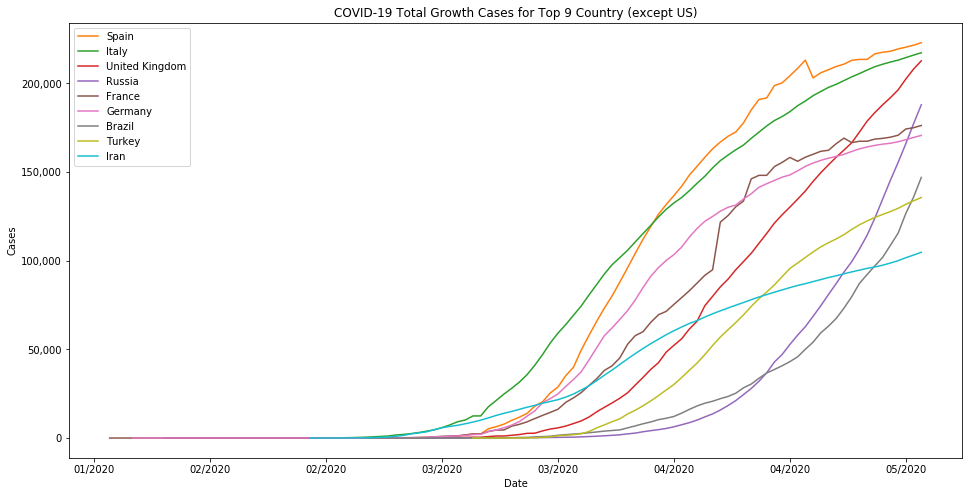

<Figure size 684x432 with 0 Axes>

In [278]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(16, 8))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

for i, country_name in enumerate(top10_countries.Country_Region.values):
    if i == 0:
        continue
    df = get_country_by_date(country_by_date, country_name).sort_values(by='Date')
    ylabels = [format(label, ',.0f') for label in ax.get_yticks()]
    ax.set_yticklabels(ylabels)
    ax.plot(df['Date'].values, df['ConfirmedCases'], label=country_name, color=colors[i])

ax.set(xlabel="Date",
       ylabel="Cases",
       title="COVID-19 Total Growth Cases for Top 9 Country (except US)")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.legend()
plt.show()
plt.gcf().autofmt_xdate()